<a href="https://colab.research.google.com/github/Sara1428/CPP_Assignment/blob/main/Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Python**

## 1.a
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [ ]:
def F(n):
    for i in range(n):
        chars = [chr(ord('A') + i-j) for j in range(i + 1)]
        sequence = ''.join(chars + chars[-2::-1])
        dashes = '-' * (n - i - 1)
        print(dashes + sequence + dashes)

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [ ]:
def F(d : dict):
    # sorting by key values ascending
    sorted_by_key = sorted(d.items())
    print("Sorted by key (ascending):")
    for key, (x, y) in sorted_by_key:
        print(f"{key}, {x}, {y}")

    # sorting by x values (descending)
    sorted_by_x = sorted(d.items(), key=lambda item: item[1][0], reverse=True)
    print("\nSorted by x (descending):")
    for key, (x, y) in sorted_by_x:
        print(f"{key}, {x}, {y}")

    # sorting by y values (ascending)
    sorted_by_y = sorted(d.items(), key=lambda item: item[1][1])
    print("\nSorted by y (ascending):")
    for key, (x, y) in sorted_by_y:
        print(f"{key}, {x}, {y} ")

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key (ascending):
1, 1, 2
2, -1, 4
4, 2, 3
5, -4, 3

Sorted by x (descending):
4, 2, 3
1, 1, 2
2, -1, 4
5, -4, 3

Sorted by y (ascending):
1, 1, 2 
5, -4, 3 
4, 2, 3 
2, -1, 4 
Sorted by key (ascending):
-8, 4, 2
5, 9, -10
6, -3, 4
7, 2, 1

Sorted by x (descending):
5, 9, -10
-8, 4, 2
7, 2, 1
6, -3, 4

Sorted by y (ascending):
5, 9, -10 
7, 2, 1 
-8, 4, 2 
6, -3, 4 


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [ ]:
#TODO
with open('student_records.csv', 'r') as file:
        lines = file.readlines()
        for i in range(min(10, len(lines))):
            print(lines[i].strip())

roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA


#### 2.b: Print out the total credits and calculte CPI of each student.
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [ ]:
#TODO
def calculate_cpi_from_csv(filename):

    grade_to_points = {
        'AP': 10, 'AA': 10,
        'AB': 9,
        'BB': 8,
        'BC': 7,
        'CC': 6,
        'CD' : 5,
        'DD' : 4,
        'FF' : 0,
        'FR' : 0
    }

    student_data = {}
    with open(filename, 'r') as file:
        next(file)
        for line in file:
            columns = line.strip().split(',')
            roll_number = int(columns[0])
            department = columns[1]
            credit = int(columns[2])
            course_name = columns[3]
            course_type = columns[4]
            grade = columns[5]
            #print(roll_number, department, credit, course_name, course_type, grade)

            if roll_number not in student_data:
                student_data[roll_number] = {
                    'total_credits': 0,
                    'total_weighted_credits' : 0,
                    'total_weighted_points': 0
                }

            grade_points = grade_to_points.get(grade, 0)

            student_data[roll_number]['total_credits'] += credit
            if (course_type == "core") :
              student_data[roll_number]['total_weighted_credits'] += credit
              student_data[roll_number]['total_weighted_points'] += credit * grade_points
            else :
              if "elective" in course_type :
                student_data[roll_number]['total_weighted_credits'] += credit
                student_data[roll_number]['total_weighted_points'] += credit * grade_points


    for roll_number, data in student_data.items():
        total_credits = data['total_credits']
        total_weighted_points = data['total_weighted_points']
        total_weighted_credits = data['total_weighted_credits']

        if total_credits > 0:
            cpi = total_weighted_points / total_weighted_credits
        else:
            cpi = 0

        print(f"Roll Number: {roll_number}")
        print(f"Total Credits: {total_credits}")
        print(f"CPI: {cpi:.2f}")
        print("-" * 40)

calculate_cpi_from_csv('student_records.csv')


Roll Number: 588946
Total Credits: 199
CPI: 8.67
----------------------------------------
Roll Number: 145372
Total Credits: 173
CPI: 7.43
----------------------------------------
Roll Number: 834515
Total Credits: 199
CPI: 8.10
----------------------------------------
Roll Number: 344265
Total Credits: 153
CPI: 8.90
----------------------------------------
Roll Number: 358405
Total Credits: 206
CPI: 8.21
----------------------------------------
Roll Number: 781075
Total Credits: 246
CPI: 8.47
----------------------------------------
Roll Number: 180828
Total Credits: 177
CPI: 7.90
----------------------------------------
Roll Number: 981238
Total Credits: 168
CPI: 8.28
----------------------------------------
Roll Number: 836881
Total Credits: 246
CPI: 7.92
----------------------------------------
Roll Number: 310604
Total Credits: 198
CPI: 8.22
----------------------------------------
Roll Number: 847809
Total Credits: 261
CPI: 8.27
----------------------------------------
Roll Numbe

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [ ]:
#TODO
student_data = {}

with open('student_records.csv', 'r') as file:

    next(file)
    for line in file:
        columns = line.strip().split(',')
        roll_number = int(columns[0])
        department = columns[1]
        credit = int(columns[2])
        course_name = columns[3]
        course_type = columns[4]
        grade = columns[5]

        if roll_number not in student_data:
            student_data[roll_number] = {
                'core': 0,
                'department_elective': 0,
                'flexible_elective': 0,
                'hasmed_elective': 0,
                'minor': 0,
                'honours': 0
            }

        if course_type == 'core':
            student_data[roll_number]['core'] += credit
        elif course_type == 'department_elective':
            student_data[roll_number]['department_elective'] += credit
        elif course_type == 'flexible_elective':
            student_data[roll_number]['flexible_elective'] += credit
        elif course_type == 'hasmed_elective':
            student_data[roll_number]['hasmed_elective'] += credit
        elif course_type == 'minor' :
          student_data[roll_number]['minor'] += credit
        elif course_type == 'honours' :
          student_data[roll_number]['honours'] += credit

print("Students who meet graduation requirements:")

for roll_number, data in student_data.items():

    core_courses = data['core']
    department_electives = data['department_elective']
    flexible_electives = data['flexible_elective']
    hasmed_electives = data['hasmed_elective']

    if (core_courses >= 20 and
        department_electives >= 15 and
        flexible_electives >= 10 and
        hasmed_electives >= 5):
        print(f"Roll Number: {roll_number}")




Students who meet graduation requirements:
Roll Number: 588946
Roll Number: 834515
Roll Number: 781075
Roll Number: 180828
Roll Number: 981238
Roll Number: 836881
Roll Number: 310604
Roll Number: 773982
Roll Number: 500658
Roll Number: 810863
Roll Number: 124663
Roll Number: 871746
Roll Number: 986057
Roll Number: 379479
Roll Number: 144528
Roll Number: 485484
Roll Number: 845623
Roll Number: 150503
Roll Number: 214270
Roll Number: 517837
Roll Number: 482623
Roll Number: 721490
Roll Number: 955757
Roll Number: 143856
Roll Number: 571782
Roll Number: 973158
Roll Number: 703403
Roll Number: 960395
Roll Number: 521087
Roll Number: 461971
Roll Number: 879634
Roll Number: 716985
Roll Number: 265922
Roll Number: 283796
Roll Number: 203200
Roll Number: 327122
Roll Number: 534763
Roll Number: 391848
Roll Number: 971123
Roll Number: 207443
Roll Number: 488661
Roll Number: 782129
Roll Number: 928288
Roll Number: 581858
Roll Number: 282482
Roll Number: 572815
Roll Number: 608952
Roll Number: 6288

#### 2.d: Print out the roll numbers of all students who completed a minor
Atleast 10 credits with minor tag in a specific department

In [ ]:
#TODO
for roll_number, data in student_data.items():
    minor_credits = data['minor']
    if minor_credits >= 10:
        print(f"Roll Number: {roll_number}, minor credits obtained: {minor_credits}")

Roll Number: 588946, minor credits obtained: 37
Roll Number: 145372, minor credits obtained: 33
Roll Number: 834515, minor credits obtained: 15
Roll Number: 344265, minor credits obtained: 28
Roll Number: 358405, minor credits obtained: 29
Roll Number: 781075, minor credits obtained: 20
Roll Number: 180828, minor credits obtained: 15
Roll Number: 981238, minor credits obtained: 22
Roll Number: 836881, minor credits obtained: 52
Roll Number: 847809, minor credits obtained: 66
Roll Number: 773982, minor credits obtained: 25
Roll Number: 500658, minor credits obtained: 21
Roll Number: 810863, minor credits obtained: 36
Roll Number: 124663, minor credits obtained: 37
Roll Number: 364146, minor credits obtained: 37
Roll Number: 871746, minor credits obtained: 14
Roll Number: 270007, minor credits obtained: 22
Roll Number: 597353, minor credits obtained: 70
Roll Number: 986057, minor credits obtained: 13
Roll Number: 718510, minor credits obtained: 24
Roll Number: 836431, minor credits obtai

#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [ ]:
#TODO
for roll_number, data in student_data.items():
    honours_credits = data['honours']
    core_credits = data['core']
    if honours_credits >= 10 and core_credits >= 20:
        print(f"Roll Number: {roll_number}")

Roll Number: 588946
Roll Number: 145372
Roll Number: 834515
Roll Number: 781075
Roll Number: 836881
Roll Number: 310604
Roll Number: 773982
Roll Number: 500658
Roll Number: 810863
Roll Number: 124663
Roll Number: 364146
Roll Number: 871746
Roll Number: 986057
Roll Number: 718510
Roll Number: 379479
Roll Number: 582912
Roll Number: 788020
Roll Number: 613401
Roll Number: 144528
Roll Number: 485484
Roll Number: 199713
Roll Number: 845623
Roll Number: 150503
Roll Number: 214270
Roll Number: 517837
Roll Number: 482623
Roll Number: 721490
Roll Number: 955757
Roll Number: 589528
Roll Number: 143856
Roll Number: 571782
Roll Number: 973158
Roll Number: 703403
Roll Number: 960395
Roll Number: 521087
Roll Number: 461971
Roll Number: 879634
Roll Number: 716985
Roll Number: 265922
Roll Number: 283796
Roll Number: 203200
Roll Number: 327122
Roll Number: 534763
Roll Number: 391848
Roll Number: 971123
Roll Number: 207443
Roll Number: 488661
Roll Number: 782129
Roll Number: 928288
Roll Number: 581858


# **SciPy**

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [ ]:
#TODO
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return 2 * (x[0] - x[1] - 3)**2 + 4 * (x[0] + 2*x[1] + 1)**4

def constraint1(x):
    return x[0] - x[1] + 3

def constraint2(x):
    return 5 - (x[0] + 2)**2 - (x[1] + 1)**2

x0 = [0, 0]

constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2}
]

result = minimize(objective, x0, constraints=constraints, method='SLSQP')

print("Optimal values of x and y: ", result.x)
print("Minimum value of the objective function: ", result.fun)


Optimal values of x and y:  [ 0.23492503 -0.92851489]
Minimum value of the objective function:  7.345026216977383


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [ ]:
#TODO
import numpy as np
from scipy.integrate import quad

def integrand(t):
    term1 = 3 * np.cos(t)**2
    term2 = 9 * np.sin(t)**4
    return (term1 + term2) * np.sqrt(3)

result, error = quad(integrand, 0, 2 * np.pi)

print("Line integral result:", result)


Line integral result: 53.05363140385086


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [ ]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [ ]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        random_indices = np.random.choice(data.shape[0], K, replace=False)
        centers = data[random_indices]
    else:
        centers = init_centers
    return centers

In [ ]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = np.ones(data.shape[0], dtype=int)
    return labels

In [ ]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    dist_squared = np.sum((data[:, np.newaxis] - centers) ** 2, axis=2)
    distances = np.sqrt(dist_squared)
    return distances

In [ ]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [ ]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    def mean(i):
        return np.mean(data[np.where(labels == i)], axis=0)
    updated_fun = np.vectorize(mean, signature='()->(n)')
    return updated_fun(np.arange(K))

In [ ]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [ ]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new

    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [ ]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set the title of the plot
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.002474069595336914


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

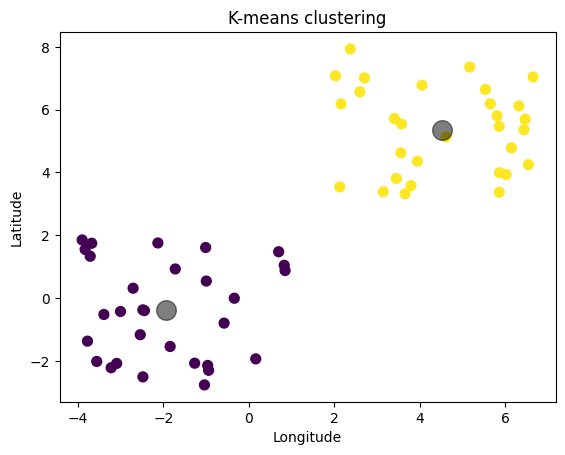

In [ ]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)